# Importation des dependances 

In [236]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

# 1) Idée d'application sur le jeu de données `open Food Fac`

L'analyse du jeu de données **open Food Fac** peut donner lieu à plusieurs d'idées d'application pour les professionnels de santé. Aujourd'hui, un consommateur français est très souvent confrontés à l'ambarant de choix par rapport à la qualité ou à une multitude de version d'un même produit. L'utilisateur s'interroge sur plusieurs caractéristiques du produit notamment est-ce que naturel/bio, éco ou encore responsable. Ce dilenme de choix constitue une partie du problème. L'autre partie du problème concerne la corrélation qui pourrait exister entre ce que l'on mange ou bois et notre performance au quotidient dans le travail notamment. Pour elaborer notre idée d'application, nous allons nous intéressé à l'un de ces cas de corrélation cachés qui venons d'evoquer.

Pour notre d'idée d'application, nous avons pensé à la `corrélation qui existent entre notre alimentation et la qualité de notre sommeil`. Nous allons être specifique quand la nature du produit concerné. Notre problématique peut se être reformuler en posant la question suivante: `Quels sont les vitamines, ingrédients ou nutriments qui contribuent à la qualité de notre sommeil quotidient?`. 

Comme vous le saviez le sommeil a une importance capital dans notre `système immunitaire`. Il contribue également à notre `performance au travail`. Comme indicateur majeur de l'importance du sujet, d'après le service  CHU de Bordeau, spécialisé sur les troubles du sommeil, le manque de sommeil peut favoriser la contraction du `COVID-LONG`.

Pour mener notre étude, nous allons au préalable, identifier ces ingredients, nutriments ou vitamines en faisant un bref état d'art sur la thématique. Ensuite, nous justifiérons ces faits en faisant une analyse exploratoire de notre jeu de donées nettoyé.

## 1.1) Etat d'art sur la thématique `alimentation ou nutrition et sommeil`

Nous pouvons lire sur l'article **sommeils: Ces 5 vitamines et minéreaux qui aideraient a mieux dormir** de CNEWS publié le 23 juin `2021` (pour lire l'article cliquer [ici](https://www.cnews.fr/nutrition/2021-06-23/sommeil-ces-5-vitamines-et-mineraux-qui-aideraient-mieux-dormir-1096566)) que l'insomnie, réveil matinal, nuit agitéé, etc peuvent être lutter en consommant au quotidient les 5 vitanimes ou minéreaux suivants:
> - **La vitamine B3 ou Niacine**: present dans `les abats, les volailles et les poissons gras, les céréales`. Elle sert à créer de la sérotonine et de la mélatonine communément appelée « hormone du sommeil ».
> - **La Vitamine D**: une étude publiée dans le Journal of Clinical Sleep Medicine a montré qu'il existe une forte corrélation entre la somnolence excessive et la carence en vitamine D. A défaut du soleil, la vitamine D peut être récuperée en consommant `saumon, thon, foie de morue`… 
> - **Le magnesium**: en plus de ses bienfaits pour lutter contre le stress, le minéral magnesium se revéle efficace contre les insomnies. Il est présent dans `les céréales complètes, le chocolat noir, les noix et les amandes et enfin certaines eaux minérales`.
> - **Le potassium**: c'est un sel minéral qu'on trouve dans `les bananes, les avocats, les haricots ou encore les patates douces`. Il est connue pour son efficacité contre les reveils précoces qui se muent en insomnie.

En plus de ces informations, nous avons consulté d'autres références qui nous ont permit de rdecouvrir d'autres indices sur le sujet tels que [source](https://institut-sommeil-vigilance.org/sommeil-et-alimentation/):
> - **Les féculents** riches en **glucides** et présents dans `le riz, les pâtes, la semoule, le pain, la pomme de terre`…
> - **Les sucre lents** qui facilitent a production de la sérotonine indispensable à la sécrétion de la mélatonine, hormone qui apporte l’information à l’organisme qu’il fait nuit et qu’il est temps de dormir.
> - Le **tryptophane**, un acide aminé que le corps ne sait pas fabriquer, favorise l’endormissement. On trouve le `tryptophane` dans Les œufs, Les noix, amandes et noisettes, Les produits laitiers, Certaines céréales et féculents : avoine, soja, mais, seigle, sésame, riz, quinoa, etc.
> - **La caféine, la taurine, la nicotine, alcool**, dont les propriétés éveillantes sont connues, est présente dans le café, le thé, le chocolat, l'alcool et la plupart des boissons énergisantes ou à base de cola sont un impact négatif sur le sommeil notamment lorsqu'on les consomment dans l'après-midi.

## 1.2) Strategie de mise en application

Pour réaliser notre application, nous allons procéder comme suit:
> - Après chargement et prise de connaissance du jeu de données, nous axaminerons les valeurs des colonnes qui constituent nos indices a fin de verifier la faisabilité de notre application
> - Ensuite, nous nettoyerons nos donées dans le sens d'optimiser au maximum nos indices
> - Enfin, nous implementerons les fonctions nécessaire à sa mise en pratique

# 2) Analyse pré-exploratoire

## 2.1) Mission 
Notre objectif dans cette première phase du projet consiste à charger le jeu de données disponible sur `Open Food Fac` et prendre connaissance des données dans un premier temps. Dans un second temps, nous examinons la qualité des données et ensuite apporter des actions correctives afin de la préparer pour la seconde phase, **phase d'exploration !**

## 2.2) Chargement des données
Nous avons télecharger le jeu de données disponible [ici](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip). Il s'agit d'un fichier au format `.csv`. Donc nous allons le chargé à l'aide de la founction `read_csv` de `pandas`. Le résultat du chaegement est stocké dans la variable `df_foods` de type 'DataFrame`.

Comme l'indique le [fichier descriptif des données](https://world.openfoodfacts.org/data/data-fields.txt):
- les colonnes sont uniquement separarées par des tabulations
- l'encodage utilisé est *UTF-8*
- les entêtes des colonnes sont déjà définis 
Ces informations nous permettent d'initialiser les arguments de la fonction `read_csv`.

In [237]:
df_foods = pd.read_csv('data/fr.openfoodfacts.org.products.csv', sep = '\t', encoding = 'UTF-8')

/opt/miniconda3/envs/p1Sante/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**👉  Observons les 5 premières lignes de notre dataframe pour verifier si les données sont correctements chargées**

In [238]:
pd.set_option('display.max.columns', None)
pd.set_option('display.precision', 3)

In [239]:
df_foods.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [240]:
df_foods.tail(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,Plastique,plastique,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:RO,en:romania,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,Plastique,plastique,Trader Joe's,trader-joe-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic peppermint, organic lemon grass, organ...",NaN,NaN,NaN,NaN

##### 🧠 Comme vous pouvez le constater, notre jeu de données est correctement chargé.

## 2.3) Le DataFrame

**👉 Voyons combien de `lignes` et de `colonnes` sont contenues dans `df_foods`**

In [241]:
df_foods.shape

(320772, 162)

In [242]:
df_foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


##### 🧠 Nous avons 56 colonnes de `type` objet qui correspodent à des chaînes de caractères. Le jeu de données occupe presque `400 MB de la mémoire RAM`. Ce qui est considérable. Mais il reste à savoir si tous ces colonnes aussi utiles par rapport à notre objectif. Pensons aux **données manquantes!**. Il va falloir identifier les colonnes qui nous seront utiles à notre application par la suite et se debarasser des autres.

## 2.4) Qualité des données

**👉 Mesurons le pourcentage de `valeurs manquantes` par colonne**

In [243]:
df_foods.isna().mean(axis=0)

code                       7.170e-05
url                        7.170e-05
creator                    6.235e-06
created_t                  9.352e-06
created_datetime           2.806e-05
                             ...    
carbon-footprint_100g      9.992e-01
nutrition-score-fr_100g    3.104e-01
nutrition-score-uk_100g    3.104e-01
glycemic-index_100g        1.000e+00
water-hardness_100g        1.000e+00
Length: 162, dtype: float64

In [244]:
df_foods.isnull().all().sum()

16

**👉 Mesurons la moyenne du nombre des colonnes pour lesquelles le pourcentage de `valeurs manquantes` est superieur à `50%*`**

In [245]:
s = df_foods.isnull().mean(axis=0) >= 0.5
s.value_counts()

True     128
False     34
dtype: int64

##### 🧠 Nous pouvons constater que `16` colonnes sont vides. En plus il y a `34` colonnes qui ont un pourcentage de `valeurs manquantes` supérieure à `50%`. Ce qui signie nous sommes en face à un jeu de données relativement `moins riches`. Nous allons apporter une solution à ce problème en fonction de notre application.

**👉 Vérifions si les colonnes `date` sont bien typées**

In [246]:
df_foods[['created_t','created_datetime','last_modified_t',	'last_modified_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   created_t               320769 non-null  object
 1   created_datetime        320763 non-null  object
 2   last_modified_t         320772 non-null  object
 3   last_modified_datetime  320772 non-null  object
dtypes: object(4)
memory usage: 9.8+ MB


##### 🧠 Comme nous pouvons le voir, les dates ne sont pas bien typées. Nous adapterons les formats des dates dans la section suivante.

**👉 Voyons s'il existe des duplicatas en scrutant le feature `code`**

In [247]:
df_foods.duplicated(subset=['code']).sum()

133

##### 🧠 Vue que les duplicatas n'ont pas de valeur ajouté, il va falloir les supprimer pour reduire la taille du jeu de données. ####

##### Faisons la description metier afin de comprendre la signification de quelques importantes colonnes.

## 2.5) Description metier

### `Généralité`
Les 162 champs sont repartis sur quatre catégaries:
> Les données de references telsque code, nom, date de création, date de modification \
> Un ensemble de tags relatif aux à l'origine, fabriquant, catégaries du produit, localisation, place de vente et pays de vente \
> La Composition du produit: ingrédients naturals et additifs associés \
> Les informations nutritionnelles: quantité du nutriment pour 100g du produit, score nutritionnel attribué par UK FSA pour 100g 

## 1.3) Étude de faisabilité de l'application

**👉 Faisons une statistique non-exhaustive sur les indices de notre application**

In [248]:
indices_app = ['vitamin-d_100g','magnesium_100g', 'potassium_100g', 'glucose_100g', 'sucrose_100g', 'sugars_100g', 'taurine_100g', 'caffeine_100g', 'alcohol_100g']
df_foods[indices_app].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   vitamin-d_100g  7057 non-null    float64
 1   magnesium_100g  6253 non-null    float64
 2   potassium_100g  24748 non-null   float64
 3   glucose_100g    26 non-null      float64
 4   sucrose_100g    72 non-null      float64
 5   sugars_100g     244971 non-null  float64
 6   taurine_100g    29 non-null      float64
 7   caffeine_100g   78 non-null      float64
 8   alcohol_100g    4133 non-null    float64
dtypes: float64(9)
memory usage: 22.0 MB


In [249]:
df_foods[indices_app].describe()

,vitamin-d_100g,magnesium_100g,potassium_100g,glucose_100g,sucrose_100g,sugars_100g,taurine_100g,caffeine_100g,alcohol_100g
count,7.057e+03,6253.000,24748.000,26.000,72.000,244971.000,29.000,78.000,4133.000
mean,7.969e-06,0.534,0.425,2.879,11.842,16.003,0.146,1.595,7.838
std,3.596e-04,13.499,12.529,6.290,13.994,22.327,0.172,6.476,10.960
min,0.000e+00,0.000,0.000,0.000,0.000,-17.860,0.002,0.000,0.000
25%,1.050e-06,0.021,0.107,0.200,2.100,1.300,0.035,0.015,0.000
50%,1.175e-06,0.075,0.180,0.250,8.100,5.710,0.039,0.021,5.000
75%,3.325e-06,0.141,0.341,1.400,16.150,24.000,0.400,0.043,12.000
max,3.000e-02,657.143,1870.370,23.200,92.800,3520.000,0.423,42.280,97.900


In [250]:
df_foods[indices_app].isnull().mean()

vitamin-d_100g    0.978
magnesium_100g    0.981
potassium_100g    0.923
glucose_100g      1.000
sucrose_100g      1.000
sugars_100g       0.236
taurine_100g      1.000
caffeine_100g     1.000
alcohol_100g      0.987
dtype: float64

##### 🧠 Ces analyses montrent que certains de nos indices notamment `glucose_100g`, `sucrose_100g`, `taurine_100g`, `caffeine_100g` sont très peu representés. Nous pouvons envisager de les enrichir en ajoutant d'autres échantillons par la suite. Par ailleurs l'indice `tryptophane` est manquant. Nous avons retrouver sur [wikipedia](https://en.wikipedia.org/wiki/Tryptophan) la composition en tryptophane des 100 aliments les plus riches en tryptophane. Comme il s'agit d'un indice essentiel pour notre analyse, nous avons pensé à l'ajouter à notre jeu de données après le nettaoyage de ce dernier.

## 2.6) Nettoyage du jeu de données

### 2.6.1) Visualisation des données manquantes avec `missingno`

<AxesSubplot:>

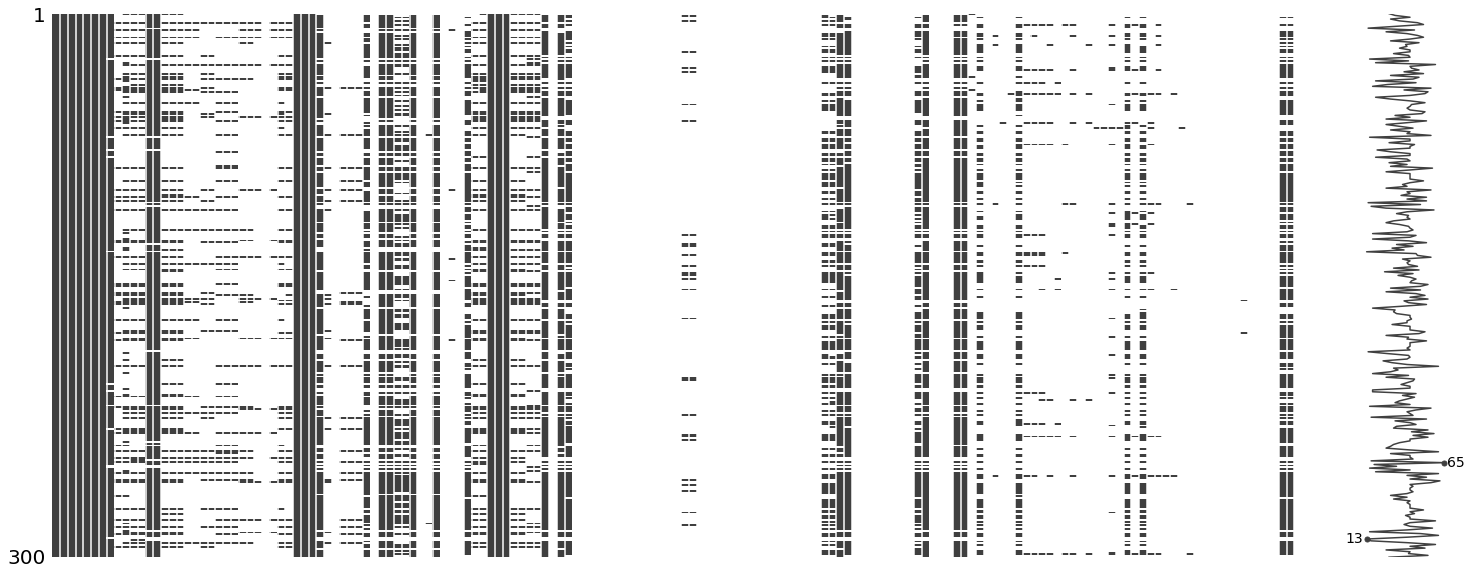

In [251]:
%matplotlib inline
msno.matrix(df_foods.sample(300))

<AxesSubplot:>

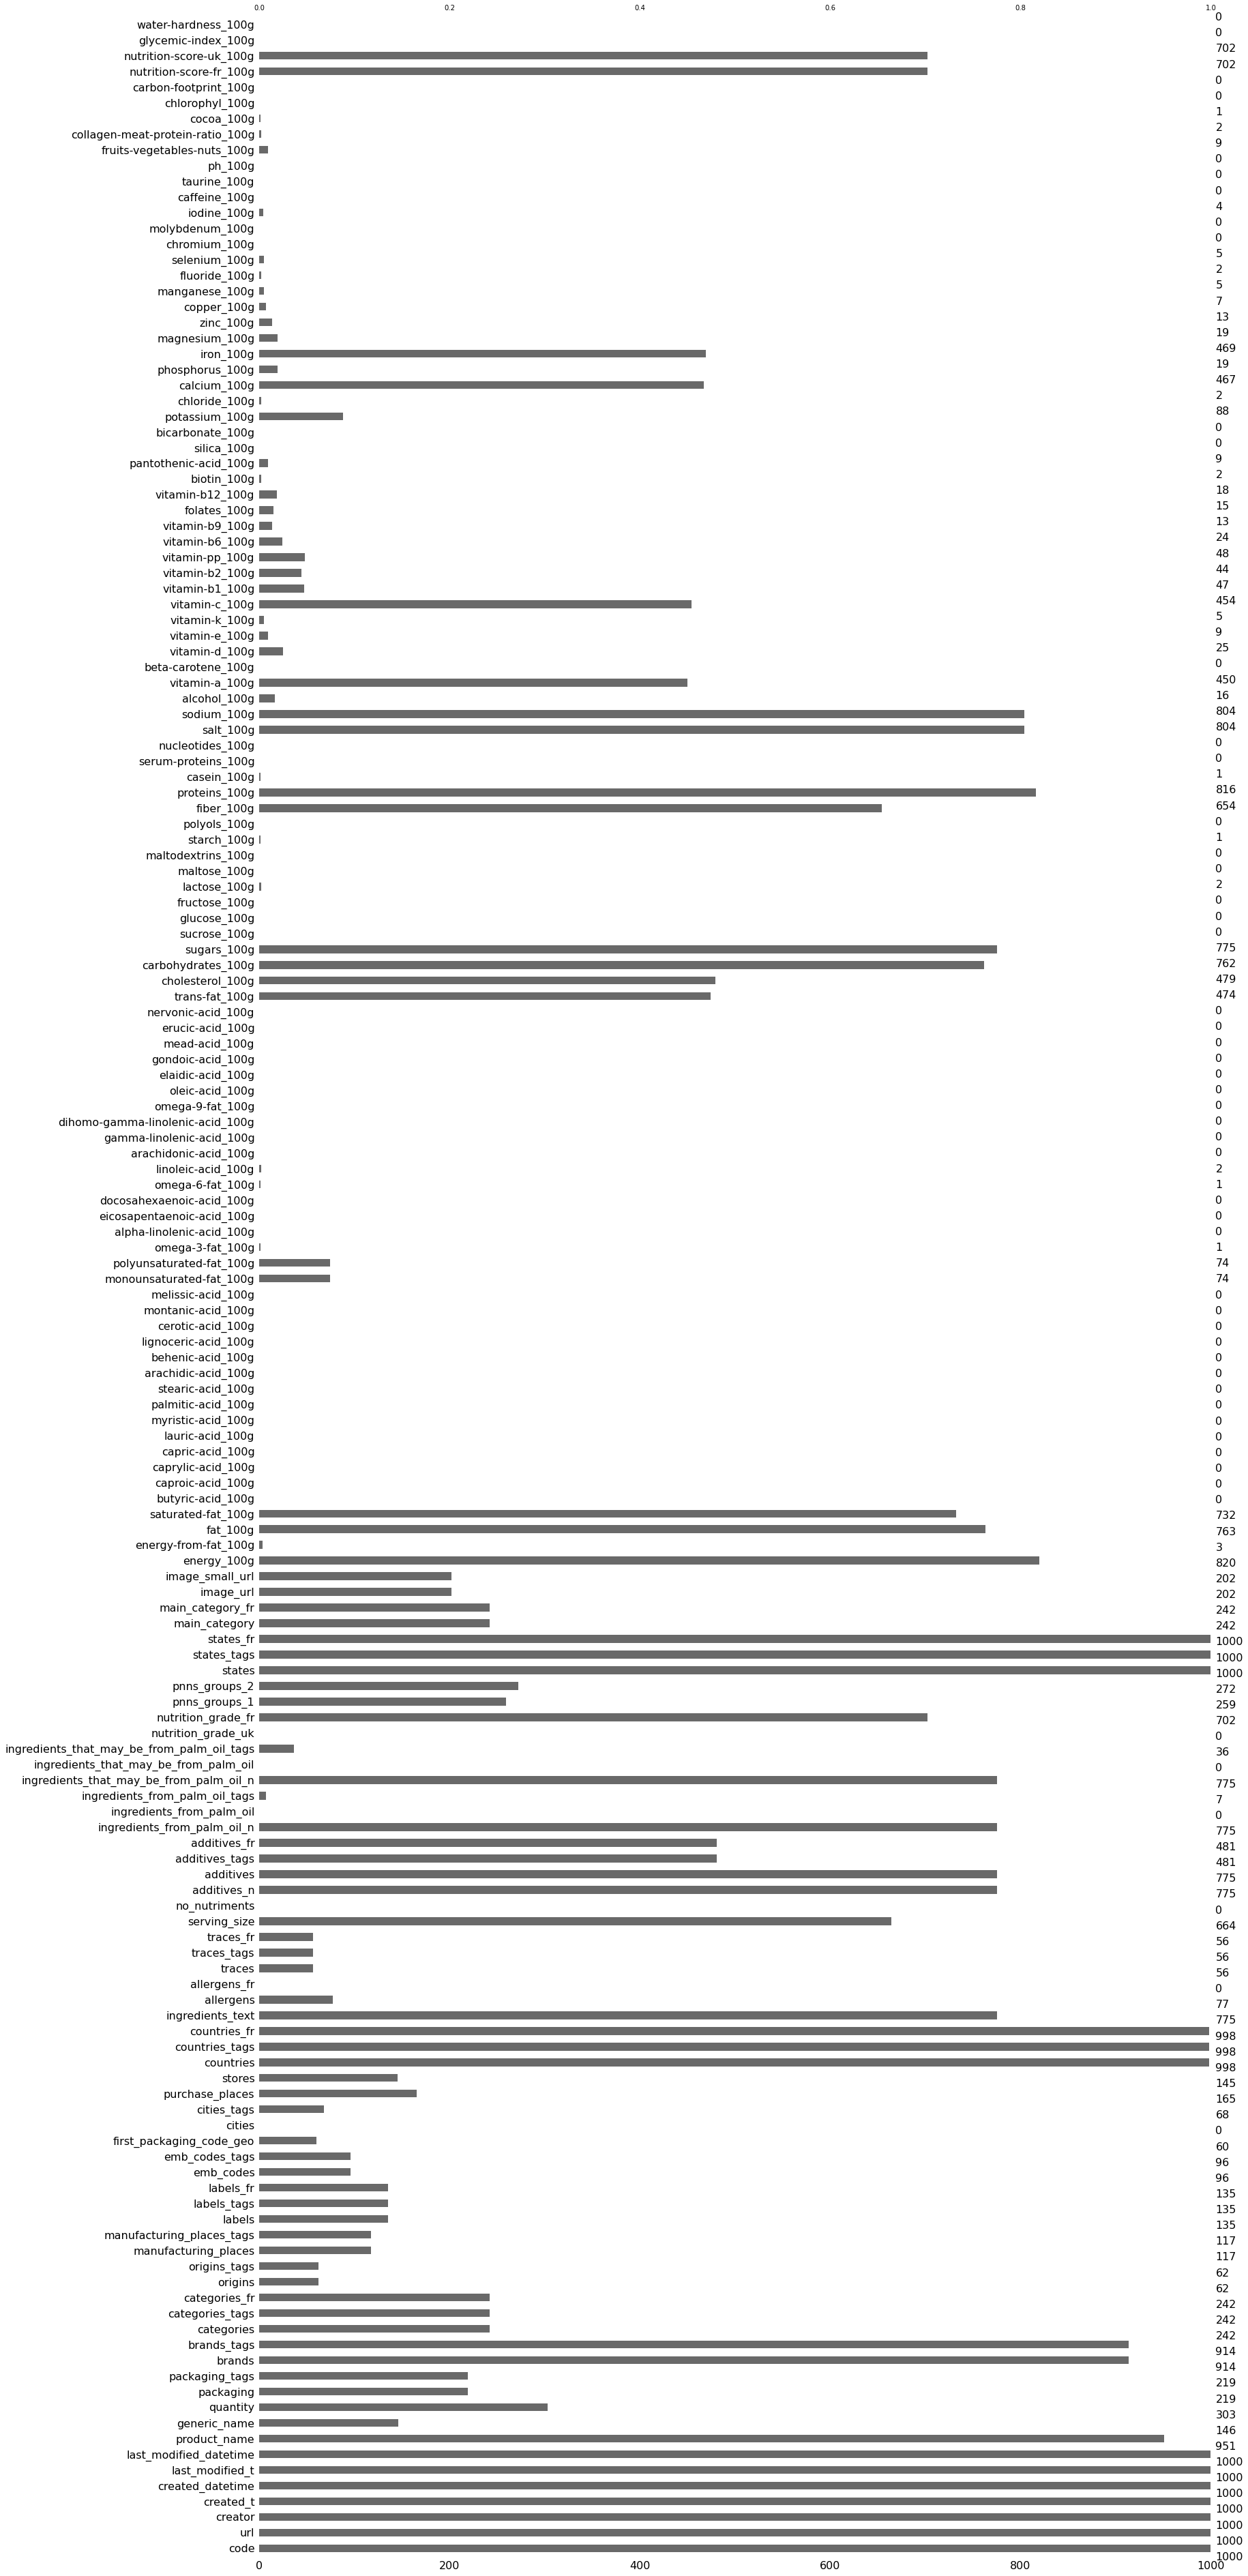

In [252]:
msno.bar(df_foods.sample(1000))

<AxesSubplot:>

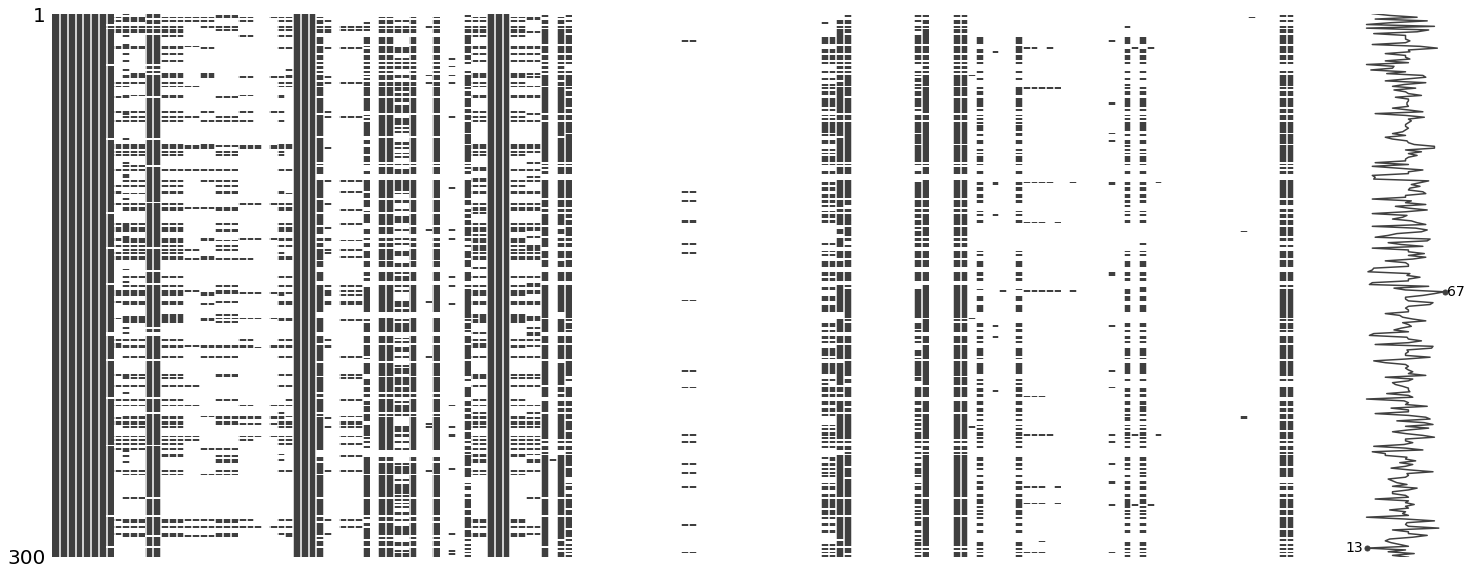

In [253]:
msno.matrix(df_foods.sample(300))

##### 🧠 Les plots ci-dessus nous montre que la plupart des champs qui decrivent la composition nutritionnelle de l'aliment sont presque vides. ####

**👉 Supprimons les duplicatas**

In [254]:
df_foods = df_foods.drop_duplicates(subset=['code'])

In [255]:
df_foods.duplicated(subset=['code']).sum()

0

**👉 Supprimons toutes les colonnes avec tous les champs inconnus, ou `NaN` en anglais**

In [256]:
df_foods = df_foods.dropna(how='all', axis=1)
#df_foods = df_foods.loc[:, ~df_foods.isnull().all()]
df_foods.shape

(320639, 145)

In [257]:
df_foods = df_foods.dropna(how='all', axis=0)
df_foods.shape

(320639, 145)

<AxesSubplot:>

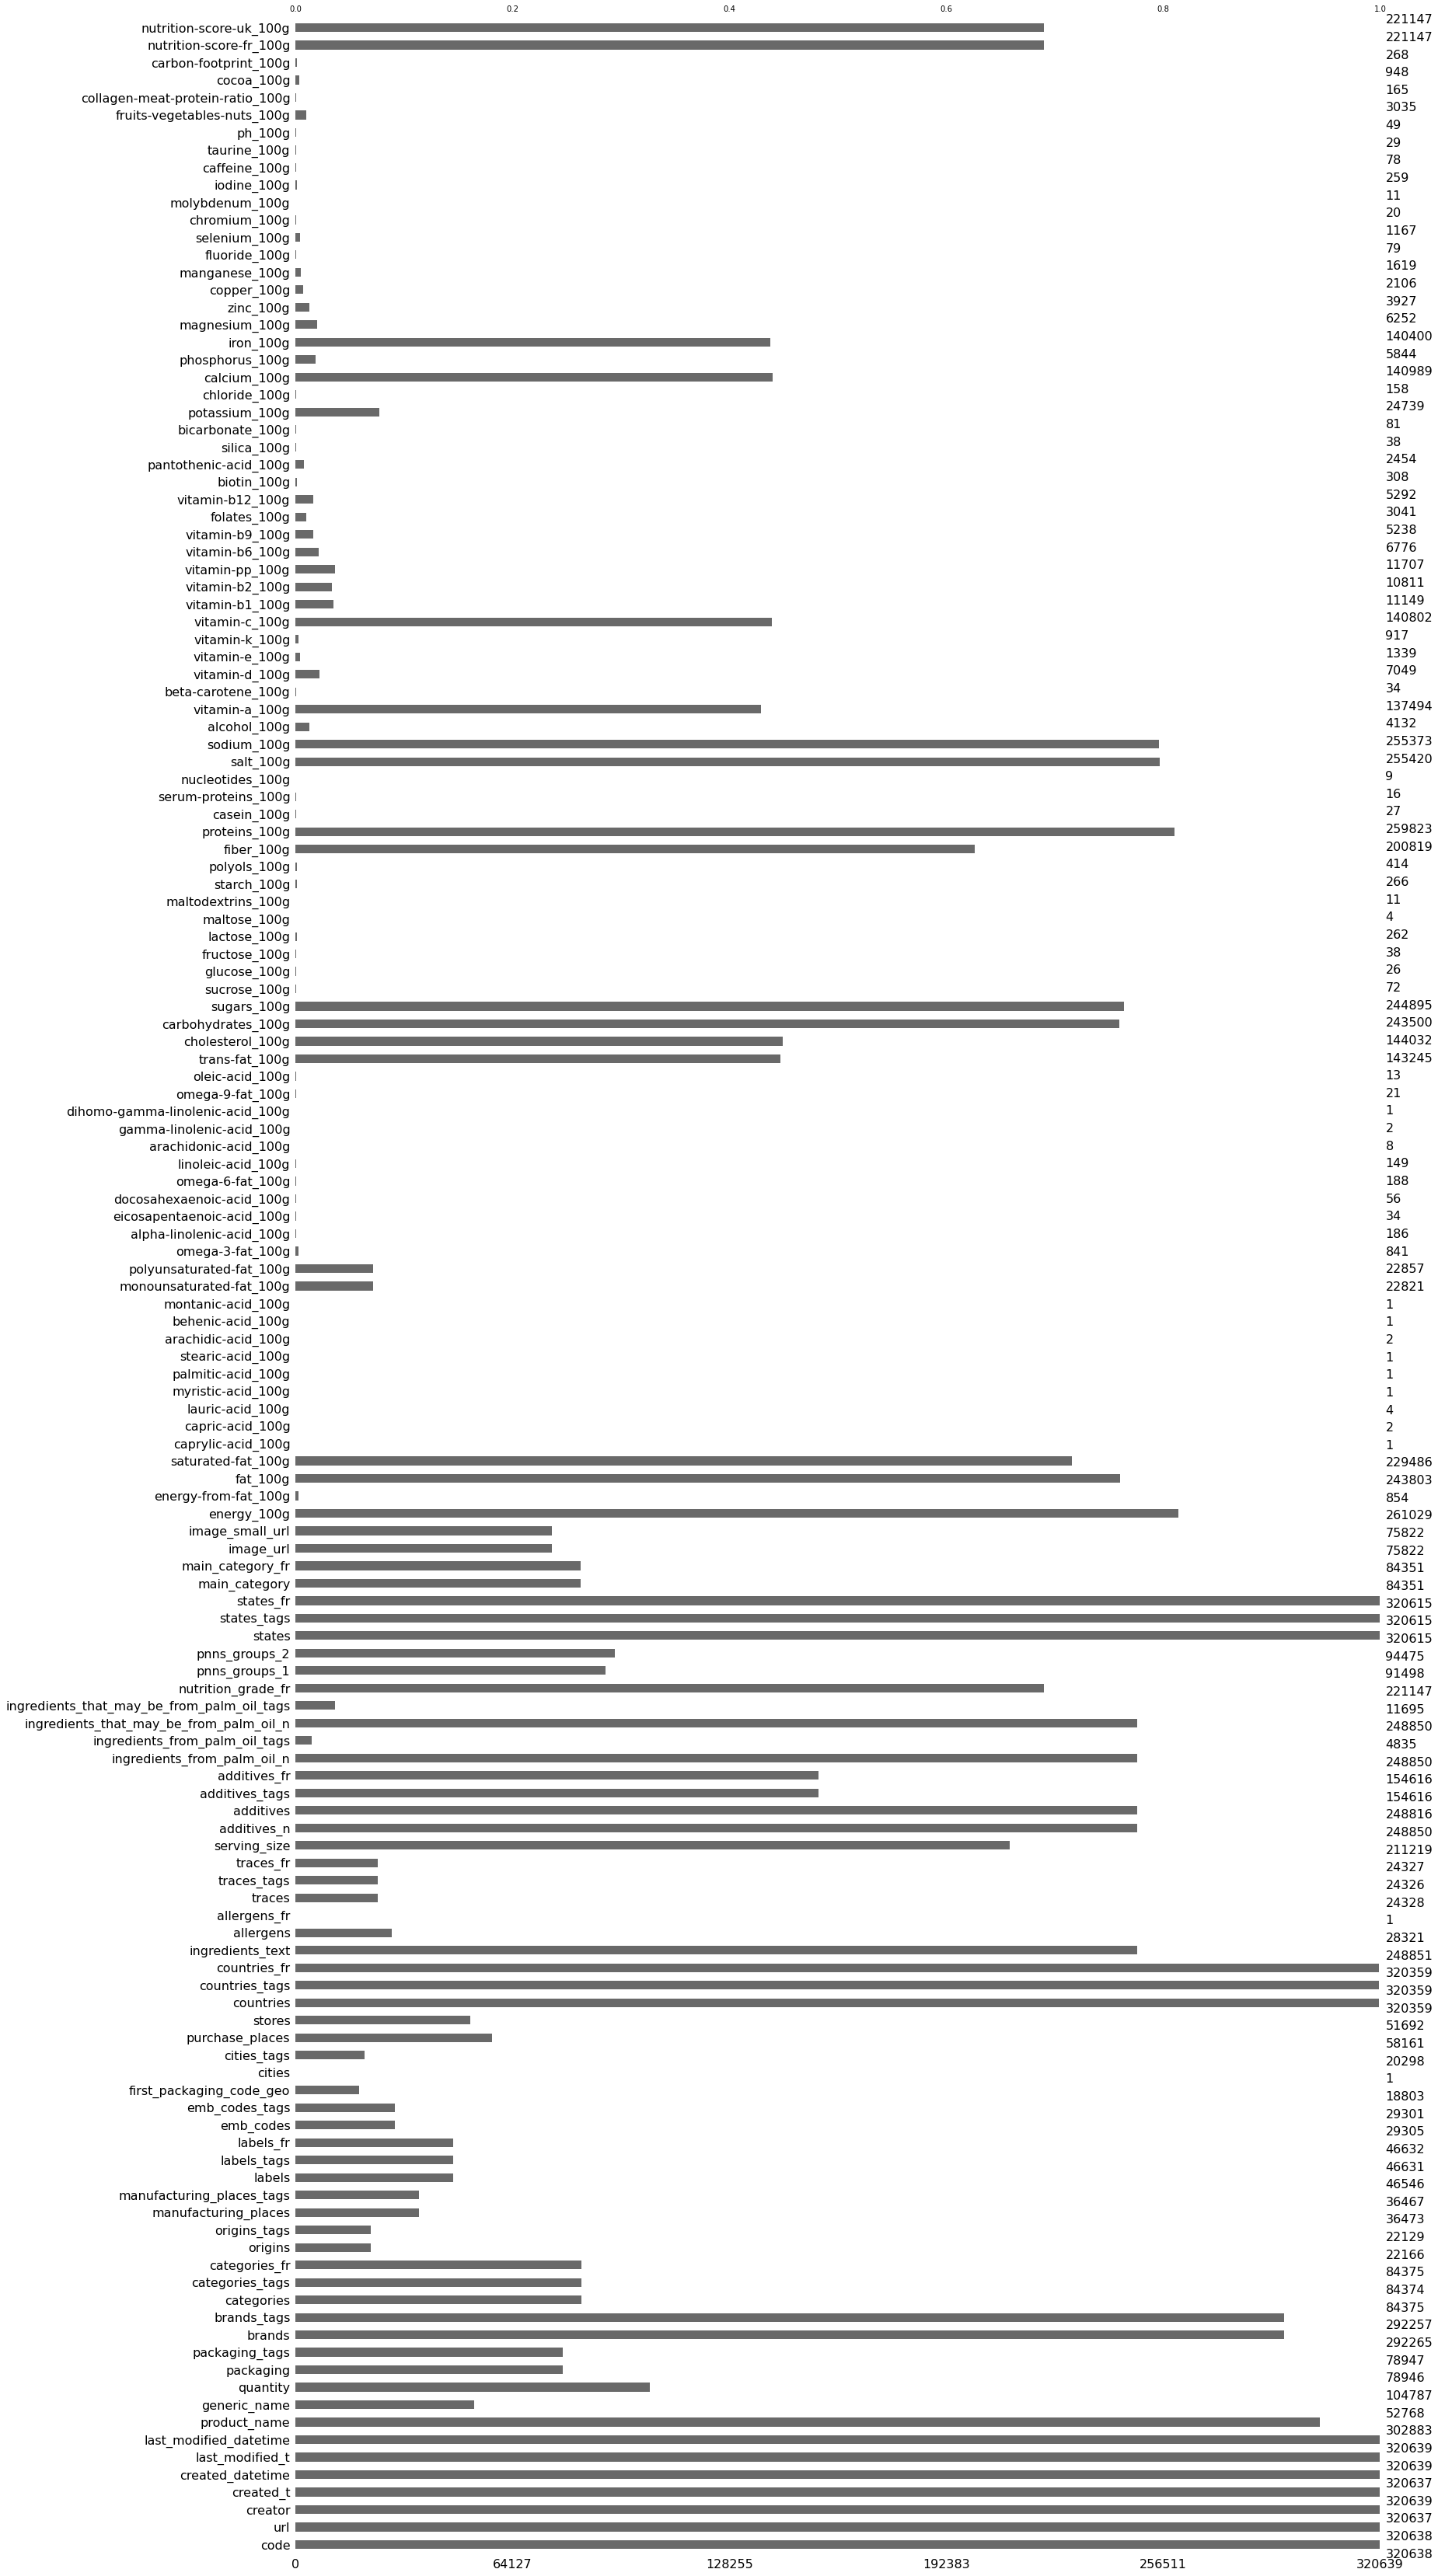

In [258]:
msno.bar(df_foods)

**👉 Copyons les indices de notre application afin de les concerver contre le nettoyage dans la section suivante**

In [259]:
df_app = df_foods[indices_app]

In [260]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320639 entries, 0 to 320771
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   vitamin-d_100g  7049 non-null    float64
 1   magnesium_100g  6252 non-null    float64
 2   potassium_100g  24739 non-null   float64
 3   glucose_100g    26 non-null      float64
 4   sucrose_100g    72 non-null      float64
 5   sugars_100g     244895 non-null  float64
 6   taurine_100g    29 non-null      float64
 7   caffeine_100g   78 non-null      float64
 8   alcohol_100g    4132 non-null    float64
dtypes: float64(9)
memory usage: 24.5 MB


**👉 Supprimons toutes les colonnes dont le pourcentage de données manquantes est supérieure à `90%`**

In [261]:
df_foods = df_foods.dropna(thresh=100, axis='columns')
df_foods.shape

(320639, 110)

In [262]:
#df_foods = df_foods.drop(columns=[col for col in df_foods.columns if not df_foods[col].isna().mean() < 0.9], axis=1)

<AxesSubplot:>

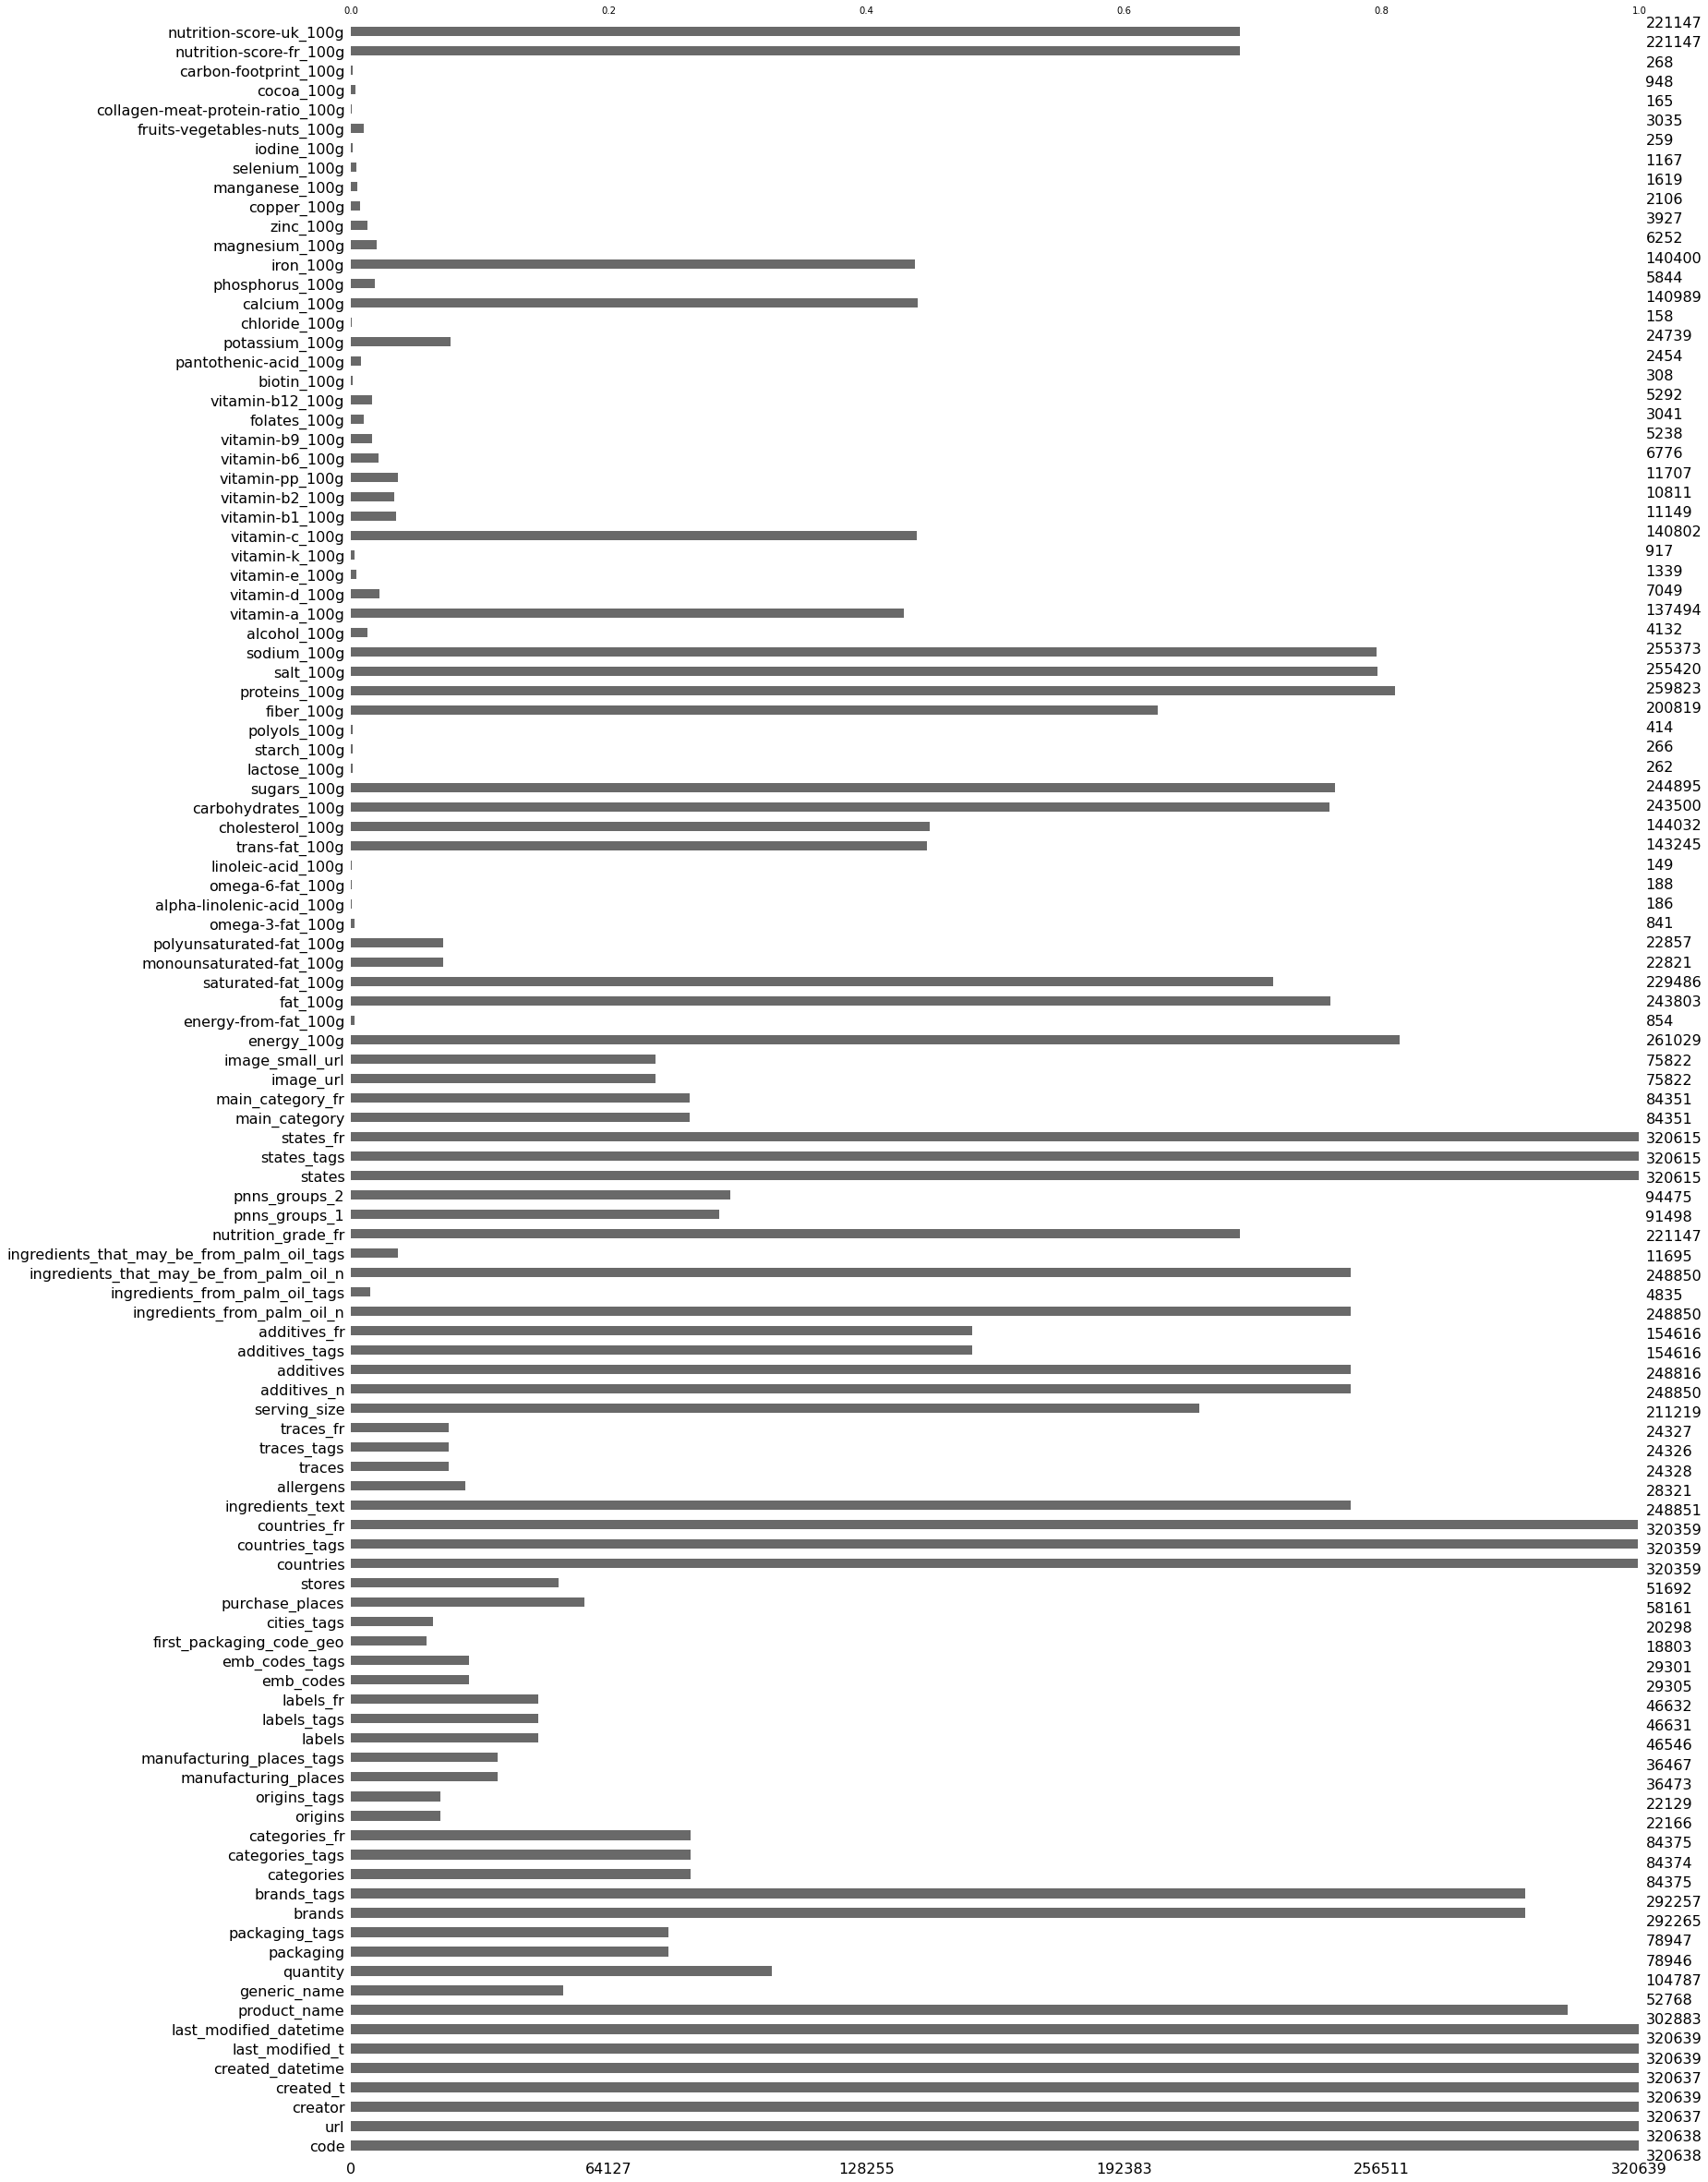

In [263]:
msno.bar(df_foods)

**👉 Analysons la différence entre l'indice `packaging` et `packaging_tags`**

In [264]:
df_foods['packaging']  = df_foods['packaging'].str.lower()

In [265]:
df_foods[df_foods['packaging'] != df_foods['packaging_tags']].groupby('product_name')[['packaging','packaging_tags']].head(20)

,packaging,packaging_tags
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
320761,bouteille en verre,bouteille-en-verre
320762,NaN,NaN
320763,"boîte,carton","boite,carton"
320764,NaN,NaN


##### 🧠 Le résultat de l'analyse montre que les colonnes `packaging` et `packaging_tags`contiennent pratiquement les même informations.Ce resultat se généralise sur les colonnes similaires. Pour notre cas, nous supprimons toutes les colonnes `tags` afin de réduire la taille notre doneés.

In [266]:
df_foods.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'copper_100g', 'manganese_100g', 'selenium_100g', 'iodine_100g',
       'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
       'cocoa_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object', length=110)

In [267]:
columns_to_drop = [col for col in df_foods.columns if col.endswith('tags')]
columns_to_drop

['packaging_tags',
 'brands_tags',
 'categories_tags',
 'origins_tags',
 'manufacturing_places_tags',
 'labels_tags',
 'emb_codes_tags',
 'cities_tags',
 'countries_tags',
 'traces_tags',
 'additives_tags',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_tags',
 'states_tags']

In [268]:
df_foods['cities'] = df_foods['cities_tags']

In [269]:
df_foods = df_foods.drop(columns=columns_to_drop)

In [270]:
df_foods.shape

(320639, 97)

In [271]:
df_foods['code'].is_unique

True

In [275]:
df_foods.to_csv('products_cleaned.csv', index=False)

In [235]:
#df_foods.set_index('code', inplace=True)
#df_foods.shape

In [278]:
x=(1, 1)
x == (1, 1)
sum(x)

2

## To do 
1 - Description metiers\
2 - Visual pour presenter les valeurs misingo \
3 - install plotly \
4 - Univarier des colonnes selectionnés \
6-  supprimer les colonnes constants \
7-  analyse univariée \
6-  analyse multivariée

**👉 Mainténant il serait utile d'avoir quelques informations sur le `type` de chacune des `colonnes`**